In [1]:
! pip install tensorflow==2.0

#  these tend to either not work well with multi-layer Neural Networks or don’t parallelize well to 
#  run on GPUs or a distributed network or are far too computationally intensive for large matrices.

In [0]:
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
from numpy import argmax
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

(100, 4) (50, 4) (100,) (50,)
Test Accuracy: 0.860


In [0]:
samodel = Sequential()
samodel.add(Dense(10, activation='relu', input_shape=(n_features,)))
samodel.add(Dense(6, activation='relu'))
samodel.add(Dense(3, activation='softmax'))

samodel.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
std = 0.1
def next_state(previous_state):
  return np.random.normal(previous_state, std)
def change_weights(weights):
  for i in range(len(weights)):
        if(len(weights[i].shape) == 2):
          for j in range(len(weights[i])):
              weight_branch = weights[i][j]
              for l in range(len(weights[i][j])):
                 weights[i][j][l] = next_state(weights[i][j][l])


In [6]:
def p(energy_of_x, T):
  return np.exp(-1 * energy_of_x/T)

T = 1000
losses = []
accuracy_list = []
update_rate = 3
index = 0
while(T>0):
  index += 1
  old_loss, old_acc = samodel.evaluate(X_train, y_train, verbose=0)
  weights = np.array(samodel.get_weights())
  old_weights = weights.copy()
  change_weights(weights)
  samodel.set_weights(weights)
  new_loss, new_acc = samodel.evaluate(X_train, y_train, verbose=0)
  if(new_loss > old_loss):
    alpha = p(new_loss, T)/p(old_loss, T)
    s = np.random.uniform(0,1)
    if(s>alpha):
        samodel.set_weights(old_weights)
  
  y_pred = samodel.predict_classes(X_test)
  con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
  last_loss, last_acc = samodel.evaluate(X_test, y_test, verbose=0)
  accuracy_list.append(last_acc)
  losses.append(last_loss)
  if(index % update_rate == 0):
    T -= 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


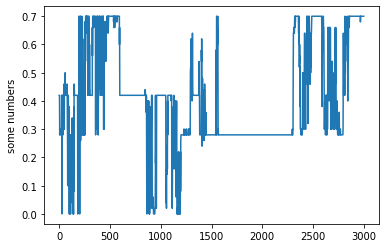

In [7]:
import matplotlib.pyplot as plt
plt.plot(accuracy_list)
plt.ylabel('Accuracy')
plt.show()